In [12]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import h5py
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
tf.random.set_seed(42)

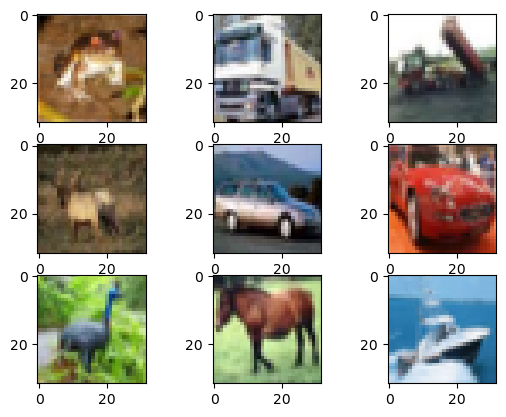

In [14]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [15]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.3
    )
datagen.fit(x_train)

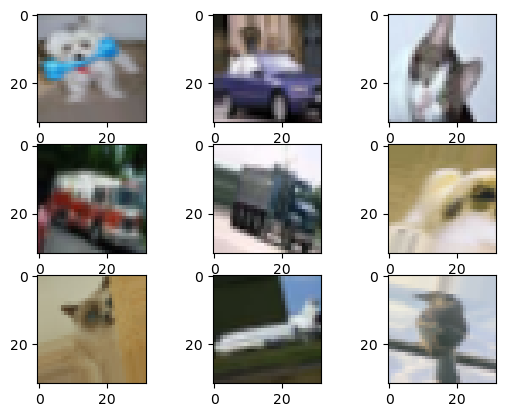

In [16]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [17]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [18]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [19]:
# labels
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
# build again, same model as model1

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
reg2=None
num_filters=32
ac='relu'

lr = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-08

adm = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)

opt=adm
drop_dense=0.5
drop_conv=0

model = Sequential(name='cifar10')

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_1'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_2'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(1024, activation=ac, kernel_regularizer=reg2, name='hidden_4'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(512, activation=ac, kernel_regularizer=reg2, name='hidden_5'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax', name='output'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [12]:
model.summary()

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                           

In [13]:
checkpoint = ModelCheckpoint("cifar10_best_result1.h5", save_best_only=True)

In [14]:
# train with image augmentation
history=model.fit(datagen.flow(x_train, y_train, batch_size=256),
                    steps_per_epoch = len(x_train) / 256, epochs=200, 
                  validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/200



196/195 [==============================] - ETA: 0s - loss: 2.1282 - accuracy: 0.3198

C:\Users\sasha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


195/195 [==============================] - 252s 1s/step - loss: 2.1282 - accuracy: 0.3198 - val_loss: 2.6531 - val_accuracy: 0.2477
Epoch 2/200
195/195 [==============================] - 241s 1s/step - loss: 1.4973 - accuracy: 0.4658 - val_loss: 1.3847 - val_accuracy: 0.4962
Epoch 3/200
195/195 [==============================] - 242s 1s/step - loss: 1.2850 - accuracy: 0.5437 - val_loss: 0.9980 - val_accuracy: 0.6463
Epoch 4/200
195/195 [==============================] - 232s 1s/step - loss: 1.1427 - accuracy: 0.5986 - val_loss: 1.0895 - val_accuracy: 0.6347
Epoch 5/200
195/195 [==============================] - 240s 1s/step - loss: 1.0366 - accuracy: 0.6334 - val_loss: 0.9429 - val_accuracy: 0.6760
Epoch 6/200
195/195 [==============================] - 240s 1s/step - loss: 0.9514 - accuracy: 0.6696 - val_loss: 1.0030 - val_accuracy: 0.6811
Epoch 7/200
195/195 [==============================] - 243s 1s/step - loss: 0.8892 - accuracy: 0.6928 - val_loss: 0.7956 - val_accuracy: 0.7326
Epoc

195/195 [==============================] - 217s 1s/step - loss: 0.2095 - accuracy: 0.9264 - val_loss: 0.3354 - val_accuracy: 0.8978
Epoch 114/200
195/195 [==============================] - 213s 1s/step - loss: 0.2116 - accuracy: 0.9267 - val_loss: 0.3075 - val_accuracy: 0.9055
Epoch 115/200
195/195 [==============================] - 221s 1s/step - loss: 0.2104 - accuracy: 0.9285 - val_loss: 0.3229 - val_accuracy: 0.9038
Epoch 116/200
195/195 [==============================] - 216s 1s/step - loss: 0.2123 - accuracy: 0.9271 - val_loss: 0.3108 - val_accuracy: 0.9035
Epoch 117/200
195/195 [==============================] - 218s 1s/step - loss: 0.2091 - accuracy: 0.9283 - val_loss: 0.3645 - val_accuracy: 0.8900
Epoch 118/200
195/195 [==============================] - 220s 1s/step - loss: 0.2042 - accuracy: 0.9296 - val_loss: 0.3211 - val_accuracy: 0.9016
Epoch 119/200
195/195 [==============================] - 216s 1s/step - loss: 0.2079 - accuracy: 0.9283 - val_loss: 0.3488 - val_accuracy:

In [15]:
# plotting helper function
def plothist(hist):
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()

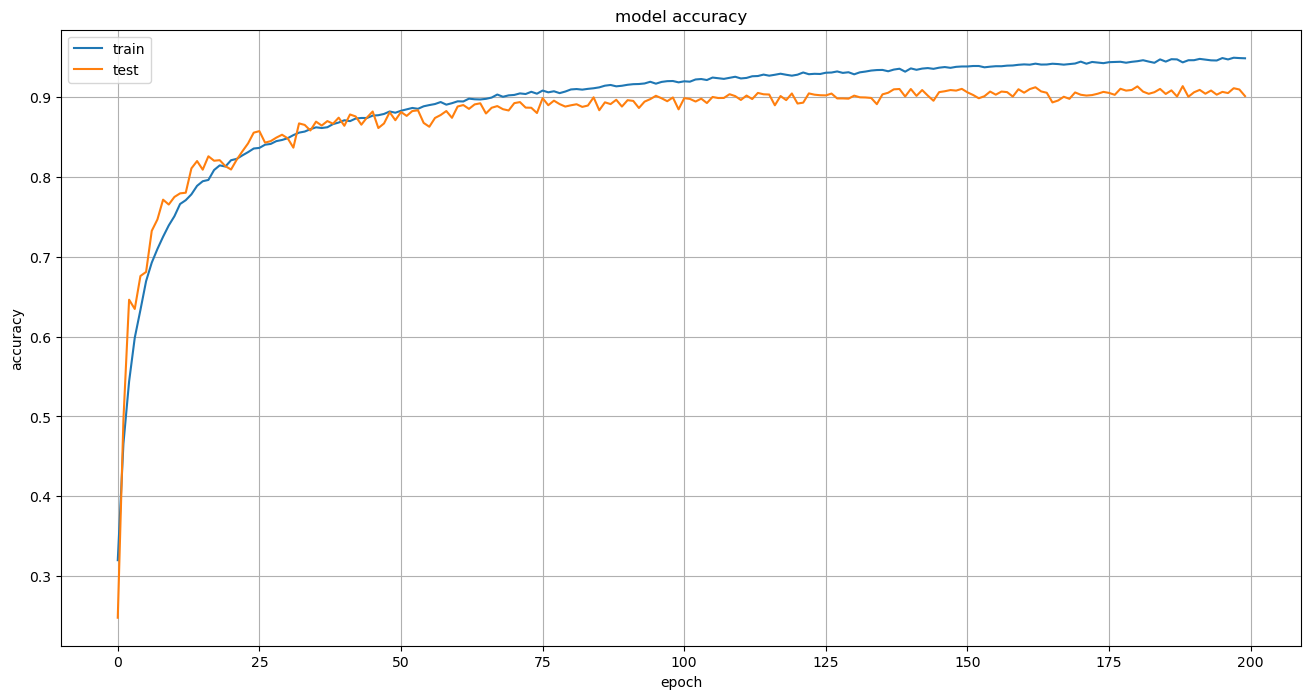

In [16]:
plothist(history)

In [17]:
model_test_acc=model.evaluate(x_test,y_test, batch_size=128)
model_test_acc

79/79 [==============================] - 12s 151ms/step - loss: 0.3498 - accuracy: 0.9015


[0.3497765362262726, 0.9014999866485596]

In [18]:
model_train_acc=model.evaluate(x_train,y_train, batch_size=128)
model_train_acc

391/391 [==============================] - 66s 167ms/step - loss: 0.0453 - accuracy: 0.9845


[0.04526820778846741, 0.9844800233840942]

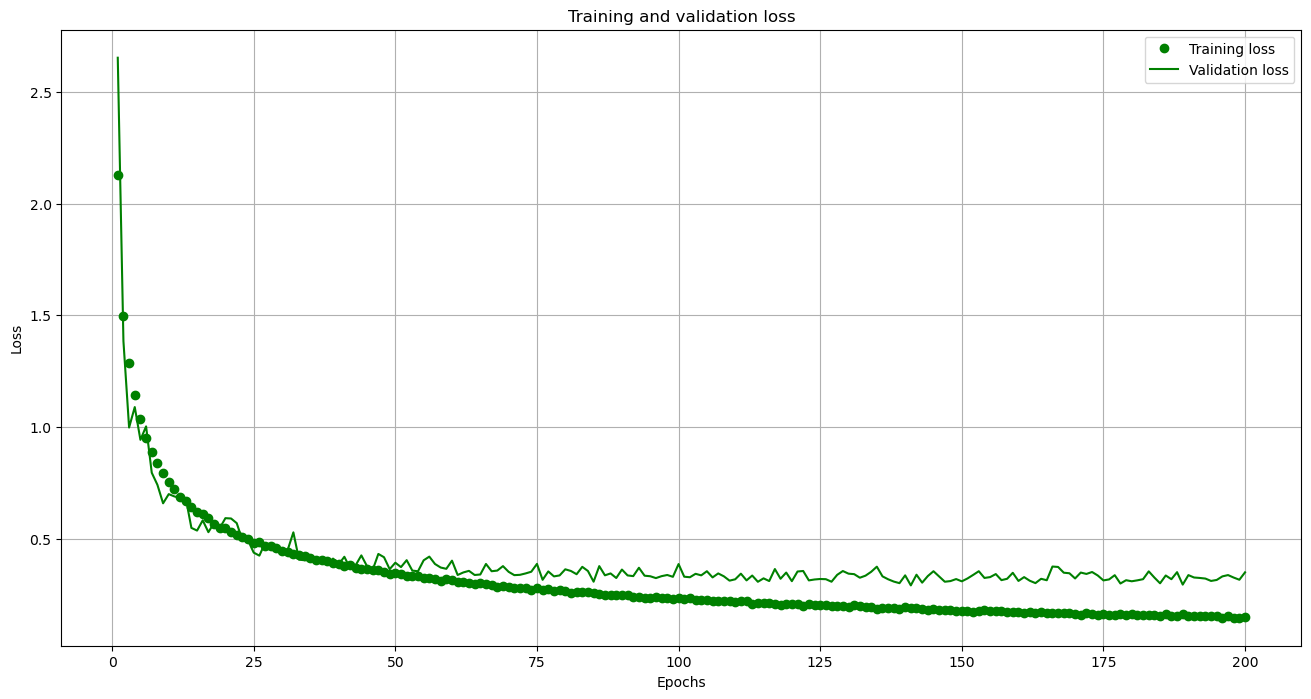

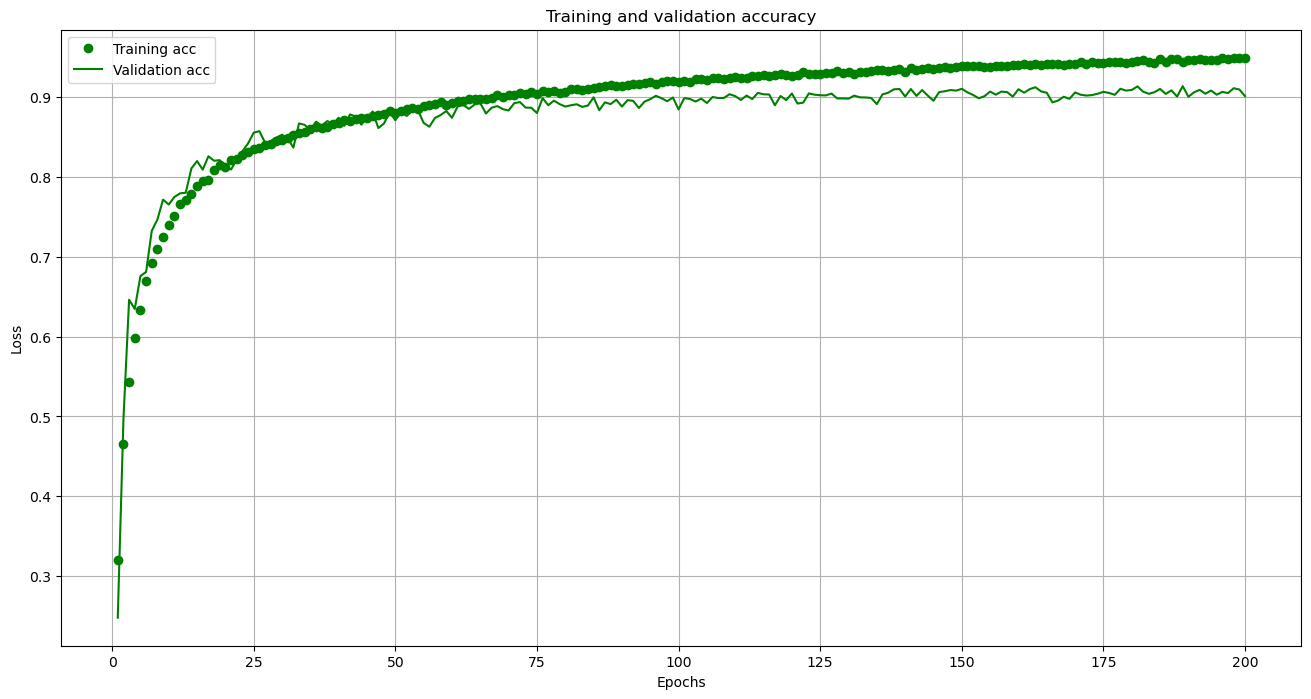

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (16, 8)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, history_dict['accuracy'], 'go', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [20]:
model.save("SmartVision_best1.h5")

In [21]:
model.save("SmartVision_best1.hdf5")

In [22]:
model.save_weights("SmartVision_best1.h5")

1/1 [==============================] - 0s 81ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


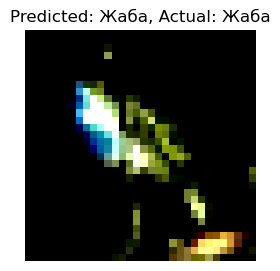

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


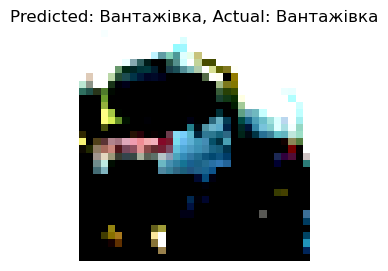

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


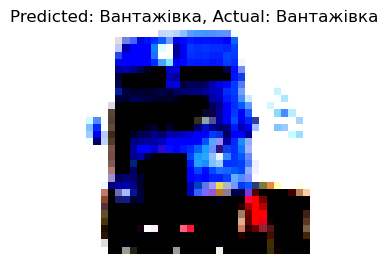

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


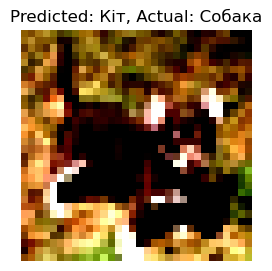

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


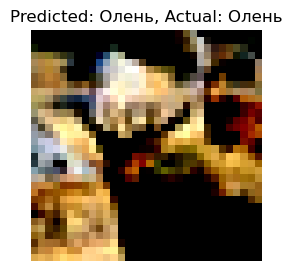

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt

class_labels = ['Літак', 'Автомобіль', 'Птах', 'Кіт', 'Олень', 'Собака', 'Жаба', 'Кінь', 'Корабль', 'Вантажівка']

random_indices = random.sample(range(len(x_test)), 5)

random_images = x_test[random_indices]
random_labels = y_test[random_indices]

predictions = model.predict(random_images)

for i in range(len(random_images)):
    plt.figure(figsize=(3,3))
    plt.imshow(random_images[i])
    plt.axis('off')
    predicted_class = class_labels[np.argmax(predictions[i])]
    actual_class = class_labels[np.argmax(random_labels[i])]
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.show()

## Завантаження та використання моделі

1/1 [==============================] - 0s 364ms/step


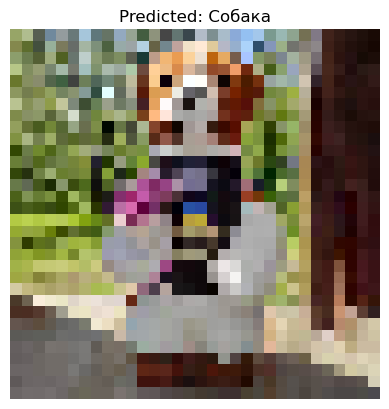

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

class_labels = ['Літак', 'Автомобіль', 'Птах', 'Кіт', 'Олень', 'Собака', 'Жаба', 'Кінь', 'Корабль', 'Вантажівка']

model = load_model('SmartVision_best_result1.h5') # завантаження моделі

img_path = '6.jpg' # приймає зображення
img = image.load_img(img_path, target_size=(32, 32)) # змінюємо розмір зображення на 32х32

img_array = image.img_to_array(img) # нормалізуємо
img_array = np.expand_dims(img_array, axis=0)
img_array = (img_array - mean) / std


prediction = model.predict(img_array) # використовуємо модель 
predicted_class = np.argmax(prediction)
predicted_label = class_labels[predicted_class] 

plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predicted_label}')
plt.show()

In [ ]:
from fastapi import FastAPI, UploadFile, File
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
​
app = FastAPI()
​
model = load_model('SmartVision_best_result1.h5')
​
@app.post("/predict/")
async def predict_image(file: UploadFile = File(...)):
    image = Image.open(file.file)
    image = image.resize((32, 32)) 
    image_array = np.array(image) / 255.0  
    image_array = np.expand_dims(image_array, axis=0) 
    
    class_labels = ['Літак', 'Автомобіль', 'Птах', 'Кіт', 'Олень', 'Собака', 'Жаба', 'Кінь', 'Корабль', 'Вантажівка']
​
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
​
    return {"predicted_class": predicted_label}